In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Road/FRCNN Google colab/FRCNN/test_img

Mounted at /content/drive
/content/drive/Shareddrives/Road/FRCNN Google colab/FRCNN/test_img


In [2]:
from xml.etree import ElementTree
import os
import csv
import cv2
import os.path

In [3]:
# โฟลเดอร์ปัจจุบัน
dir = "test_img"

In [4]:
#Path สำหรับไฟล์ xml
path = "annotations/"
files = os.listdir(path)

listDataset = []
listPart = []

In [5]:
#ดึงข้อมูลจากไฟล์ที่ทำงานจาก labelImg
for i in range(len(files)):
    tree = ElementTree.parse(path+'/'+files[i])
    root = tree.getroot()
    filenameDataset = root.findall(".//filename")[0].text
    countObj = root.findall(".//object")
    
    for j in range(len(countObj)):
        listIndexDataset =     [countObj[j].findall(".//xmin")[0].text,
                                countObj[j].findall(".//ymin")[0].text,
                                countObj[j].findall(".//xmax")[0].text,
                                countObj[j].findall(".//ymax")[0].text]
        classDataset =          countObj[j].findall(".//name")[0].text
        part = dir+"/images/"+filenameDataset
        
        listDataset.append(part
              +","+listIndexDataset[0]
              +","+listIndexDataset[1]
              +","+listIndexDataset[2]
              +","+listIndexDataset[3]
              +","+classDataset)
        listPart.append(part)

In [6]:
#เก็บข้อมูลทุกอย่างอยู่ใน Text File ชื่อ annotate.txt
with open('annotate.txt', 'w') as f:
    for line in listDataset:
        path = line.split(",")
        print(path)
        if os.path.exists(path[0][len(dir)+1:]):
            f.write(line)
            f.write('\n')

['test_img/images/Fresh-plums-fruit-tree-leaves_1920x1200.jpg', '764', '385', '1108', '784', 'apple']
['test_img/images/Fresh-plums-fruit-tree-leaves_1920x1200.jpg', '54', '694', '447', '1125', 'apple']
['test_img/images/Fresh-plums-fruit-tree-leaves_1920x1200.jpg', '1066', '401', '1435', '800', 'apple']
['test_img/images/Fresh-plums-fruit-tree-leaves_1920x1200.jpg', '1316', '478', '1693', '902', 'apple']
['test_img/images/Fresh-plums-fruit-tree-leaves_1920x1200.jpg', '54', '38', '758', '475', 'banana']
['test_img/images/Fresh-plums-fruit-tree-leaves_1920x1200.jpg', '915', '890', '1238', '1172', 'orange']


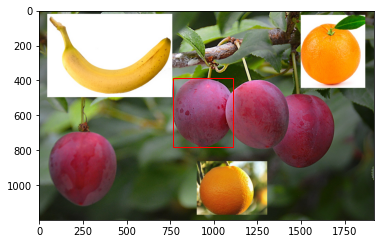

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# ทดลองอ่านไฟล์ annotate.txt ในบรรทัดที่ 1

#      image_path,      xmin, ymin,   xmax,  ymax,   class
# images/apple_77.jpg,   71,   60,    175,    164,   apple

image_path, xmin, ymin, xmax, ymax, clas= listDataset[0].split(",")
image_path
X_MIN, Y_MIN = int(xmin), int(ymin)
X_MAX, Y_MAX = int(xmax), int(ymax)
WIDTH = X_MAX - X_MIN
HEIGHT = Y_MAX - Y_MIN

im = Image.open(image_path[len(dir)+1:])
fig, ax = plt.subplots()
ax.imshow(im)
rect = patches.Rectangle((int(X_MIN), int(Y_MIN)), WIDTH, HEIGHT, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()